# This is the final Project for IBM Data Science Capstone
## Location for programmable toy store in Toronto

#### To import some useful packages

In [1]:
from bs4 import BeautifulSoup

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

import json # library to handle JSON files
import urllib # lib to handle url
import os

import math # used for math calculation

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [2]:
#!pip install pywget

In [3]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

## Section 1:First lets download the Open data of Toronto Neighborhood profile and Deal with the Population and Income

Neighborhood profile are available from https://open.toronto.ca/

In [4]:
#!pywget https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv 

Rename the file name to Profile_Toronto

In [5]:
#os.rename("neighbourhood-profiles-2016-csv.csv","Profile_Toronto.csv")

In [6]:
#Define the function to drop useless rows
def drop_dfRow(dataframe,specifyStr,specifyColumn):
    for row,col in dataframe.iterrows():
        if specifyStr in col[specifyColumn]:
            dataframe.drop(row,axis=0,inplace=True)
    return dataframe

Read the file into TorontoProfileDFtemp

#### Start deal with temp data TorontoProfileDFtemp

In [7]:
TorontoProfileDFtemp = pd.read_csv("Profile_Toronto.csv")

Lets Drop the useless columns

In [8]:
TorontoProfileDFtemp.drop(['_id','Data Source'],axis=1,inplace=True)
drop_dfRow(TorontoProfileDFtemp,'Language','Category')
drop_dfRow(TorontoProfileDFtemp,'Mobility','Category')
drop_dfRow(TorontoProfileDFtemp,'Labour','Category')
drop_dfRow(TorontoProfileDFtemp,'Journey to work','Category')
drop_dfRow(TorontoProfileDFtemp,'Housing','Category')
drop_dfRow(TorontoProfileDFtemp,'Ethnic','Category')
drop_dfRow(TorontoProfileDFtemp,'Visible minority','Category')
drop_dfRow(TorontoProfileDFtemp,'Aboriginal','Category')
drop_dfRow(TorontoProfileDFtemp,'Immigration','Category')
drop_dfRow(TorontoProfileDFtemp,'Families','Category')
drop_dfRow(TorontoProfileDFtemp,'Neighbourhood','Category')
drop_dfRow(TorontoProfileDFtemp,'Education','Category')
drop_dfRow(TorontoProfileDFtemp,'Income sources','Topic')
drop_dfRow(TorontoProfileDFtemp,'Income taxes','Topic')
drop_dfRow(TorontoProfileDFtemp,'Income of economic','Topic')
drop_dfRow(TorontoProfileDFtemp,'Low income','Topic')
drop_dfRow(TorontoProfileDFtemp,'Male','Characteristic')
drop_dfRow(TorontoProfileDFtemp,'Female','Characteristic')
drop_dfRow(TorontoProfileDFtemp,'Income of individuals','Topic')
drop_dfRow(TorontoProfileDFtemp,'Working Age','Characteristic')
drop_dfRow(TorontoProfileDFtemp,'Pre-retirement ','Characteristic')
drop_dfRow(TorontoProfileDFtemp,'Seniors','Characteristic')
drop_dfRow(TorontoProfileDFtemp,'Older Seniors','Characteristic')
TorontoProfileDFtemp.drop(['Category'],axis=1,inplace=True)
for row,col in TorontoProfileDFtemp.iterrows():
    if ('Population' in col['Topic']) & ('Population, 2016' not in col['Characteristic']):
        TorontoProfileDFtemp.drop(row,axis=0,inplace=True)
    if ('Income' in col['Topic']) & ('Average after-tax income of households' not in col['Characteristic']):
        TorontoProfileDFtemp.drop(row,axis=0,inplace=True)
TorontoProfileDFtemp.drop(['Topic'],axis=1,inplace=True)
TorontoProfileDFtemp.drop(['City of Toronto'],axis=1,inplace=True)
TorontoProfileDFtemp.rename(columns={'Characteristic':'Neighborhood'}, inplace=True)
TorontoProfileDFtemp.set_index('Neighborhood',inplace=True)

In [9]:
TorontoProfileDFtemp.head(5)

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,...,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Population, 2016","29,113","23,757","12,054","30,526","27,695","15,873","25,797","21,396","13,154","23,236","6,577","29,960","22,291","21,737","7,727","14,257","9,266","11,499","17,757","11,669","9,955","10,968","13,362","31,340","26,984",...,"15,683","21,567","10,360","21,108","16,556","7,607","17,510","65,913","27,392","33,312","26,274","17,992","11,098","27,917","50,434","16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
Children (0-14 years),"3,840","3,075","1,760","2,360","3,605","2,325","1,695","2,415","1,515","4,555","1,120","4,550","3,345","4,600","1,405","1,855","1,435","1,470","3,360",800,"1,490","1,200","2,150","1,260","4,565",...,"2,950","3,825","1,730","5,600","1,745",565,"2,630","3,650","4,635","5,060","3,440","3,100","1,675","4,215","5,920","1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"
Youth (15-24 years),"3,705","3,360","1,235","3,750","2,730","1,940","6,860","2,505","1,635","3,210",855,"4,605","2,440","3,290",885,"1,655","1,425","1,040","2,460","1,035","1,220","1,080","1,850","5,060","3,495",...,"1,690","2,075","1,410","2,455","1,630","1,485","2,030","7,840","3,950","5,445","3,355","2,225","1,415","3,650","6,940","2,230","2,625","7,660","1,035",675,"1,320","1,225",920,"4,750","1,870"
Average after-tax income of households in 2015 ($),"427,037","278,390","168,602","792,507","493,486","251,583","352,218","354,894","253,036","720,203","109,880","326,482","369,161","261,560","154,132","190,243","1,392,010","126,349","176,688","301,145","132,879","545,338","215,135","443,734","350,777",...,"102,259","659,192","140,050","195,114","333,954","197,072","171,271","662,333","316,750","426,156","332,776","171,044","127,491","336,503","572,155","272,986","412,302","629,030","240,272","147,462","239,484","222,648","541,217","302,358","213,860"


#### Here start deal with TorontoProfileDFTrans

In [10]:
TorontoProfileDFTrans = TorontoProfileDFtemp.T

In [11]:
#Change name of column
TorontoProfileDFTrans.rename(columns={'Population, 2016':'Population','Children (0-14 years)':'Children','Youth (15-24 years)':'Youth'}, inplace=True)
TorontoProfileDFTrans.rename(columns={'  Average after-tax income of households in 2015 ($)':'Income'}, inplace=True)

In [12]:
TorontoProfileDFTrans.head(5)

Neighborhood,Population,Children,Youth,Income
Agincourt North,"29,113","3,840","3,705","427,037"
Agincourt South-Malvern West,"23,757","3,075","3,360","278,390"
Alderwood,"12,054","1,760","1,235","168,602"
Annex,"30,526","2,360","3,750","792,507"
Banbury-Don Mills,"27,695","3,605","2,730","493,486"


In [13]:
TorontoProfileDFTrans['Population'] = TorontoProfileDFTrans['Population'].str.replace(',', '').astype(int)
TorontoProfileDFTrans['Children'] = TorontoProfileDFTrans['Children'].str.replace(',', '').astype(int)
TorontoProfileDFTrans['Youth'] = TorontoProfileDFTrans['Youth'].str.replace(',', '').astype(int)
TorontoProfileDFTrans['Income'] = TorontoProfileDFTrans['Income'].str.replace(',', '').astype(float)

TorontoProfileDFTrans.head()

Neighborhood,Population,Children,Youth,Income
Agincourt North,29113,3840,3705,427037.0
Agincourt South-Malvern West,23757,3075,3360,278390.0
Alderwood,12054,1760,1235,168602.0
Annex,30526,2360,3750,792507.0
Banbury-Don Mills,27695,3605,2730,493486.0


#### Now the dataframe is clean, we will get 3 kinds of data from the dataframe:
    1. population data
    2. Age
    3. Average income households

In [23]:
AVG_INCOME =  TorontoProfileDFTrans['Income'].mean(axis=0)
print('Avg households income is',AVG_INCOME,'Total population in Toronto is', TorontoProfileDFTrans['Population'].sum())

Avg households income is 351276.1285714286 Total population in Toronto is 2731571


##### To Calculate potential consumer, we treat half children will purchase the programmable toy and 30% Youth might.

In [15]:
TorontoProfileDFTrans['Potential Consumer'] = (TorontoProfileDFTrans['Children'] * 0.5 
                                                + TorontoProfileDFTrans['Youth'] * 0.3).astype(int)
TorontoProfileDFTrans.drop(['Children','Youth'],axis=1,inplace=True)
TorontoProfileDFTrans.head()

Neighborhood,Population,Income,Potential Consumer
Agincourt North,29113,427037.0,3031
Agincourt South-Malvern West,23757,278390.0,2545
Alderwood,12054,168602.0,1250
Annex,30526,792507.0,2305
Banbury-Don Mills,27695,493486.0,2621
...,...,...,...
Wychwood,14349,239484.0,1326
Yonge-Eglinton,11817,222648.0,1267
Yonge-St.Clair,12528,541217.0,881
York University Heights,27593,302358.0,3447


Now we have the number of potential consumer, We can take a look of neighbor which have more potential consumer
Note: PotentialConsumer df is used only for plot!

In [16]:
PotentialConsumer = TorontoProfileDFTrans.sort_values(['Potential Consumer'], ascending=False, axis=0)
PotentialConsumer.head()

Neighborhood,Population,Income,Potential Consumer
Woburn,53485,629030.0,7110
Rouge,46496,729154.0,5990
Malvern,43794,533202.0,5941
Mount Olive-Silverstone-Jamestown,32954,360648.0,5117
Willowdale East,50434,572155.0,5042


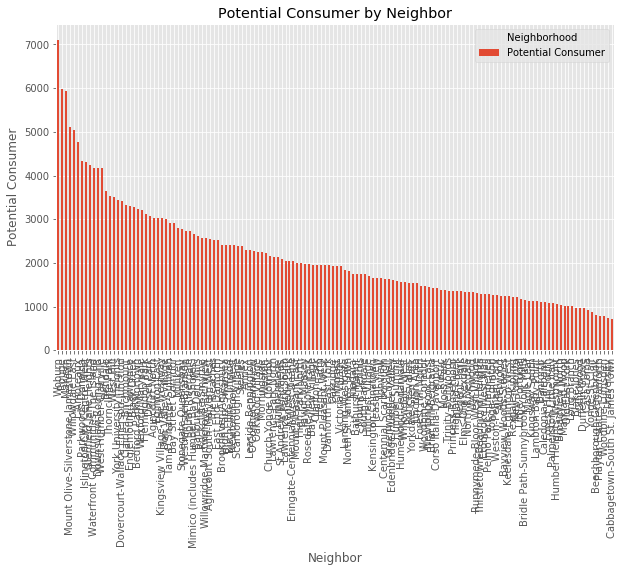

In [17]:
PotentialConsumer[['Potential Consumer']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Neighbor') # add to x-label to the plot
plt.ylabel('Potential Consumer') # add y-label to the plot
plt.title('Potential Consumer by Neighbor') # add title to the plot
plt.show()

We will find that there are too many Neighborhoods on the plot, some are with very few potential consumers. Let's choose top 20 of the neighborhoods.

In [18]:
PotentialConsumer = PotentialConsumer.head(20) #Only used for plot!!
PotentialConsumer['Income'] = PotentialConsumer['Income']/100

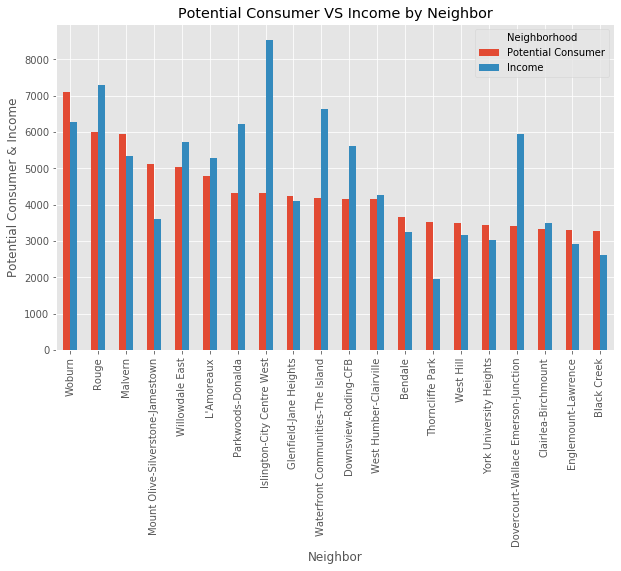

In [19]:
PotentialConsumer = PotentialConsumer[['Potential Consumer','Income']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Neighbor') # add to x-label to the plot
plt.ylabel('Potential Consumer & Income') # add y-label to the plot
plt.title('Potential Consumer VS Income by Neighbor') # add title to the plot
plt.show()

#### Here we make an assumption that with higher income, people are much more willing to buy intelligent toys for their children.
We use 'Potential Consumer' * (Income / AVG_INCOME)^2 to calculate the potential consumption.

In [24]:
df_PotentialConsumption = TorontoProfileDFTrans
df_PotentialConsumption['Potential Consumption'] = df_PotentialConsumption['Potential Consumer'] * (df_PotentialConsumption['Income']/AVG_INCOME) * (df_PotentialConsumption['Income']/AVG_INCOME)

### In Section 1, we get the dataframe of potential consumption neighborhoods which is call df_PotentialConsumption

## Section 2: We will start deal with Safety problem

We have already downloaded Toronto neighborhood crime rates data from http://data.torontopolice.on.ca/, and named it Toronto_Crime_Rates.csv here

In [122]:
TorontoCrimeDFtemp = pd.read_csv("Toronto_Crime_Rates.csv")

In [123]:
TorontoCrimeDFtemp = TorontoCrimeDFtemp[['Neighbourhood','Population','Hood_ID','Assault_AVG','AutoTheft_AVG','BreakandEnter_AVG','Homicide_AVG','Robbery_AVG','TheftOver_AVG']]
TorontoCrimeDFtemp['Total Crime'] = TorontoCrimeDFtemp['Assault_AVG'] + TorontoCrimeDFtemp['AutoTheft_AVG']\
                            + TorontoCrimeDFtemp['BreakandEnter_AVG'] + TorontoCrimeDFtemp['Homicide_AVG']\
                            + TorontoCrimeDFtemp['Robbery_AVG'] + TorontoCrimeDFtemp['TheftOver_AVG']
TorontoCrimeDFtemp.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)

In [124]:
TorontoCrimeDFtemp = TorontoCrimeDFtemp[['Neighborhood','Population','Total Crime']]

In [125]:
TorontoCrimeDFtemp.head()

,Neighborhood,Population,Total Crime
0,Yonge-St.Clair,12528,68.6
1,York University Heights,27593,665.6
2,Lansing-Westgate,16164,156.6
3,Yorkdale-Glen Park,14804,334.2
4,Stonegate-Queensway,25051,191.4


#### start merge to df_TorontoNeighbor

In [218]:
df_TorontoNeighbor = pd.merge(df_PotentialConsumption,TorontoCrimeDFtemp,how='right',on='Population',right_index=True)
df_TorontoNeighbor.drop(['Population','Income','Potential Consumer','Neighborhood'],axis=1,inplace=True)
AVG_PotentialConsumption = df_TorontoNeighbor['Potential Consumption'].mean()
AVG_CRIME = df_TorontoNeighbor['Total Crime'].mean()
print('Average Potential Consumtion is',AVG_PotentialConsumption,'and Average Crime is',AVG_CRIME)
df_TorontoNeighbor.head()

Average Potential Consumtion is 3573.0644185620395 and Average Crime is 246.2735714285715


,Potential Consumption,Total Crime
Agincourt North,4479.398207,193.1
Agincourt South-Malvern West,1598.445279,275.1
Alderwood,287.963989,91.0
Annex,11732.211082,486.6
Banbury-Don Mills,5172.725332,200.8


TorontoNeighborConsumeCrime dataframe is only for plot Potential Consumption VS Total Crime chart
To make it good looking, we divide Potential Consumption by 10

In [219]:
TorontoNeighborConsumeCrime = df_TorontoNeighbor.sort_values(['Potential Consumption'], ascending=False, axis=0).head(20)
TorontoNeighborConsumeCrime['Potential Consumption'] = TorontoNeighborConsumeCrime['Potential Consumption']/10

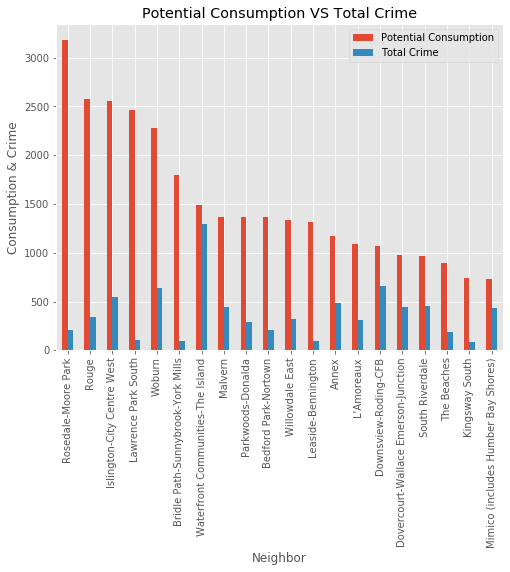

In [220]:
TorontoNeighborConsumeCrime[['Potential Consumption','Total Crime']].plot(kind='bar', figsize=(8, 6))
plt.xlabel('Neighbor') # add to x-label to the plot
plt.ylabel('Consumption & Crime') # add y-label to the plot
plt.title('Potential Consumption VS Total Crime') # add title to the plot
plt.show()

From above chart, we can see that there are some neighborhoods are both full of potential consumer, and safe as well, where the client might be satisfied with. 

In [221]:
df_TorontoNeighbor = df_TorontoNeighbor.sort_values(['Potential Consumption'], ascending=False, axis=0).head(40)
df_TorontoNeighbor['Consumption VS Risk'] = df_TorontoNeighbor['Potential Consumption'] / df_TorontoNeighbor['Total Crime']
df_TorontoNeighbor = df_TorontoNeighbor.sort_values(['Consumption VS Risk'], ascending=False, axis=0).head(20)

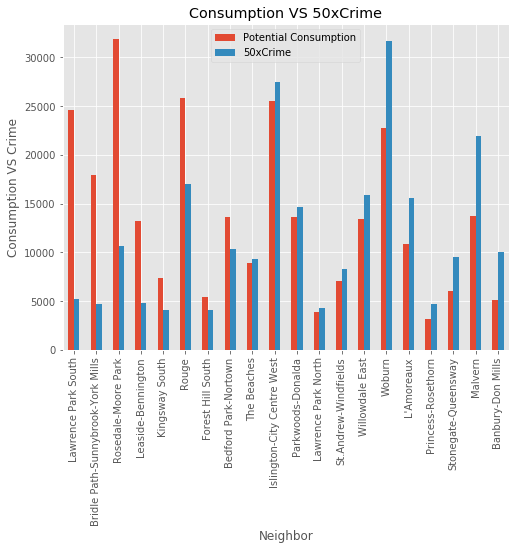

In [222]:
df_TorontoNeighbor['50xCrime'] = df_TorontoNeighbor['Total Crime']*50
df_TorontoNeighbor[['Potential Consumption','50xCrime']].plot(kind='bar', figsize=(8, 6))
plt.xlabel('Neighbor') # add to x-label to the plot
plt.ylabel('Consumption VS Crime') # add y-label to the plot
plt.title('Consumption VS 50xCrime') # add title to the plot
plt.show()

Now let's try to cluster the data

In [223]:
df_TorontoNeighbor.drop(['Consumption VS Risk','50xCrime'],axis=1,inplace=True)

In [224]:
print(df_TorontoNeighbor.max())

Potential Consumption    31848.815177
Total Crime                634.300000
dtype: float64


In [225]:
MAX_Consumption = 31848.8
MAX_Crime = 634.3

Do the normalization : value = (value - mean)/max

In [226]:
df_TorontoNeighbor['Potential Consumption'] = (df_TorontoNeighbor['Potential Consumption']-AVG_PotentialConsumption) / MAX_Consumption
df_TorontoNeighbor['Total Crime'] = (df_TorontoNeighbor['Total Crime']-AVG_CRIME) / MAX_Crime

In [227]:
# set number of clusters
kclusters = 4

df_TorontoNeighbor

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_TorontoNeighbor)
df_TorontoNeighbor.insert(0, 'Cluster Labels', kmeans.labels_)
df_TorontoNeighbor.head()

,Cluster Labels,Potential Consumption,Total Crime
Lawrence Park South,0,0.660244,-0.223354
Bridle Path-Sunnybrook-York Mills,0,0.452358,-0.241169
Rosedale-Moore Park,0,0.887812,-0.052615
Leaside-Bennington,2,0.301452,-0.235021
Kingsway South,2,0.118973,-0.258038


In [228]:
df_cluster0 = df_TorontoNeighbor.loc[df_TorontoNeighbor['Cluster Labels'] == 0]
df_cluster1 = df_TorontoNeighbor.loc[df_TorontoNeighbor['Cluster Labels'] == 1]
df_cluster2 = df_TorontoNeighbor.loc[df_TorontoNeighbor['Cluster Labels'] == 2]
df_cluster3 = df_TorontoNeighbor.loc[df_TorontoNeighbor['Cluster Labels'] == 3]
df_cluster0

,Cluster Labels,Potential Consumption,Total Crime
Lawrence Park South,0,0.660244,-0.223354
Bridle Path-Sunnybrook-York Mills,0,0.452358,-0.241169
Rosedale-Moore Park,0,0.887812,-0.052615
Rouge,0,0.698166,0.149340


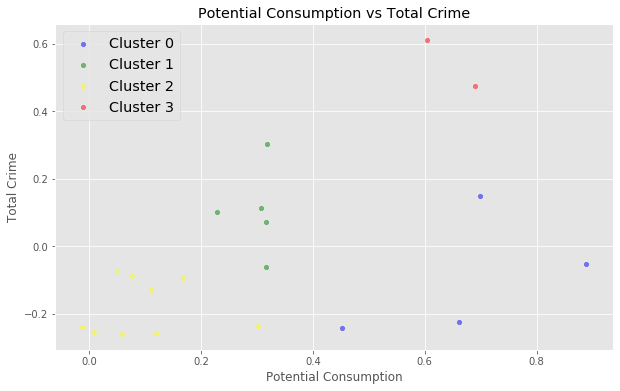

In [229]:
ax0 = df_cluster0.plot(kind='scatter', 
                       x='Potential Consumption', 
                       y='Total Crime', 
                       figsize=(10, 6), 
                       alpha=0.5,
                       color='Blue')

ax1 = df_cluster1.plot(kind='scatter',
                    x='Potential Consumption', 
                    y='Total Crime',
                    alpha=0.5,
                    color="Green",
                    ax = ax0
                   )

ax1 = df_cluster2.plot(kind='scatter',
                    x='Potential Consumption', 
                    y='Total Crime',
                    alpha=0.5,
                    color="Yellow",
                    ax = ax0
                   )

ax1 = df_cluster3.plot(kind='scatter',
                    x='Potential Consumption', 
                    y='Total Crime',
                    alpha=0.5,
                    color="Red",
                    ax = ax0
                   )

ax0.set_ylabel('Total Crime')
ax0.set_title('Potential Consumption vs Total Crime')
ax0.legend(['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3'], loc='upper left', fontsize='x-large')

####  We can see, In the neighborhoods with potential consumption, Cluster 0 with blue dots are much better to invest a store.
#### The 4 Neighborhoods are Lawrence Park South,Bridle Path-Sunnybrook-York Mills,Rosedale-Moore Park and Rouge

## Section 3: As we did in previously, we will deal with Toronto geo information here

In [68]:
#Having the url where the Zip table come from
wikiurl = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
#To scrape all content from wikiurl
wikiResponse = urllib.request.urlopen(wikiurl)
wikiHtmlDoc = wikiResponse.read()
#Use bs4 to obtain the table of data
wikiSoup = BeautifulSoup(wikiHtmlDoc,'html.parser')
wikiTable = wikiSoup.find('table',{'class':'wikitable sortable'})
#Read table into Pandas
table_rows = wikiTable.find_all('tr') #get every table row
data = []
for row in table_rows:
    td=[]
    for t in row.find_all('td'): # in each row, find the table data
        td.append(t.text.strip())
    data.append(td)
dfToronto = pd.DataFrame(data, columns=['PostalCode', 'Borough', 'Neighborhood'])
dfToronto.drop(dfToronto[dfToronto.Borough == 'Not assigned'].index, inplace=True) # remove not assigned Borough
dfToronto.drop(dfToronto[dfToronto['Borough'].isnull()].index,inplace=True) #remove the empty line

In [237]:
dfTNeiborhood = dfToronto.sort_values(by='Neighborhood',ascending=True)

In [242]:
for row,col in dfTNeiborhood.iterrows():
        if ('Lawrence Park' not in col['Neighborhood']) and ('Moore' not in col['Neighborhood']) and ('Rosedale' not in col['Neighborhood'])\
         and ('Rouge' not in col['Neighborhood']) and ('York Mills' not in col['Neighborhood']):
            dfTNeiborhood.drop(row,axis=0,inplace=True)
dfTNeiborhood

,PostalCode,Borough,Neighborhood
144,M4N,Central Toronto,Lawrence Park
196,M4T,Central Toronto,Moore Park
239,M4W,Downtown Toronto,Rosedale
11,M1B,Scarborough,Rouge
28,M1C,Scarborough,Rouge Hill
246,M1X,Scarborough,Upper Rouge
111,M2L,North York,York Mills
154,M2P,North York,York Mills West


#### Get geo coordinates

In [243]:
dfGeoToronto = pd.read_csv('Geo_Coordinates_Toronto.csv')
dfGeoToronto.rename(columns={'Postal Code':'PostalCode'},inplace=True)
dfGeoToronto.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [245]:
dfTorontoWithGeo = pd.merge(dfTNeiborhood,dfGeoToronto,how='inner',on='PostalCode',left_index=True)
dfTorontoWithGeo

,PostalCode,Borough,Neighborhood,Latitude,Longitude
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
48,M4T,Central Toronto,Moore Park,43.689574,-79.383160
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
0,M1B,Scarborough,Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill,43.784535,-79.160497
16,M1X,Scarborough,Upper Rouge,43.836125,-79.205636
20,M2L,North York,York Mills,43.757490,-79.374714
23,M2P,North York,York Mills West,43.752758,-79.400049


In [248]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


#### Create a map for listed neighborhoods

In [254]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(dfTorontoWithGeo['Latitude'], dfTorontoWithGeo['Longitude'], dfTorontoWithGeo['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Define foursquare credentials

In [255]:
# These infomation are deleted when uploading to github
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Just use the function which is already designed in previous lab

In [285]:
LIMIT = 100

In [286]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    categoryID = '4bf58dd8d48988d1f3941735' #The category ID for toy and games which found on https://developer.foursquare.com/docs/
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryID={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryID)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [287]:
toronto_toy_stores = getNearbyVenues(names=dfTorontoWithGeo['Neighborhood'],
                                   latitudes=dfTorontoWithGeo['Latitude'],
                                   longitudes=dfTorontoWithGeo['Longitude']
                                  )

In [288]:
toronto_toy_stores.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.72802,-79.38879,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.72802,-79.38879,Sherwood Park,43.716551,-79.387776,Park
2,Lawrence Park,43.72802,-79.38879,T-buds,43.731247,-79.403640,Tea Room
3,Lawrence Park,43.72802,-79.38879,Sheridan Nurseries,43.719005,-79.400500,Flower Shop
4,Lawrence Park,43.72802,-79.38879,Bobbette & Belle,43.731339,-79.403769,Bakery


#### In order not to send request from foursquare again, copy the data frame so it can be modified without original data get wrong

In [289]:
df_ToyStores = toronto_toy_stores.copy(deep=True)

In [290]:
for row,col in df_ToyStores.iterrows():
        if ('Toy' not in col['Venue Category']) and ('toy' not in col['Venue Category']) and ('TOY' not in col['Venue Category'])\
        and ('Game' not in col['Venue Category']) and ('game' not in col['Venue Category']) and ('GAME' not in col['Venue Category'])\
        and ('Lego' not in col['Venue Category']) and ('LEGO' not in col['Venue Category']) and ('lego' not in col['Venue Category']):
            df_ToyStores.drop(row,axis=0,inplace=True)

In [291]:
df_ToyStores

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
36,Lawrence Park,43.728020,-79.388790,Mastermind Toys,43.732046,-79.404141,Toy / Game Store
627,York Mills,43.757490,-79.374714,Mastermind Toys,43.769062,-79.386584,Toy / Game Store
629,York Mills,43.757490,-79.374714,The LEGO Store,43.778207,-79.343483,Toy / Game Store
733,York Mills West,43.752758,-79.400049,Mastermind Toys,43.732046,-79.404141,Toy / Game Store
754,York Mills West,43.752758,-79.400049,Mastermind Toys,43.769062,-79.386584,Toy / Game Store


In [292]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(dfTorontoWithGeo['Latitude'], dfTorontoWithGeo['Longitude'], dfTorontoWithGeo['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
for lat, lng, neighborhood in zip(df_ToyStores['Venue Latitude'], df_ToyStores['Venue Longitude'], df_ToyStores['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#ed1171',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### In above map, The blue labels are areas with high children & youth population, relatively high income and low crime data, which we say with high potential consumption; the red labels are 3 (there are 5 in the list but 2 of them are duplicated) existing toy stores. 
## Therefore, if the client want to open their store with low competition, Moore/Rosedale/Rouge should be chosen while if they would like to fight, Lawrence and York will be good place ^o^
## Just Fight!